In [ ]:
# accessing google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/idscwdatasetfolder/

Mounted at /content/drive/
/content/drive/MyDrive/idscwdatasetfolder


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta as rd

In [ ]:
date = dt.datetime(2020, 3,  1)
filename = '3661471785186399_'+str(date)[:10]+'.csv'
dataset = pd.read_csv(filename)

In [ ]:
for days in range(1, 1004):
  new_date = date + dt.timedelta(days = days)
  filename = '3661471785186399_'+str(new_date)[:10]+'.csv'
  file_contents = pd.read_csv(filename)
  dataset = pd.concat([dataset, file_contents])

In [ ]:
count_data = pd.DataFrame(index=['Column names', 'Number of NaN Values', 'Valid Values Count'])
i = 0
for column in dataset:
  nan_count = dataset[column].isna().sum()
  count_data[i] = [column, nan_count, len(dataset)-nan_count]
  i+=1
count_data

0          1           2           3           4   \
Column names          gadm_id  gadm_name  gadm_level  gadm0_name  gadm1_name   
Number of NaN Values        0          0           0           0     2396549   
Valid Values Count    2396549    2396549     2396549     2396549           0   

                              5        6                  7   \
Column names          gadm2_name  country  business_vertical   
Number of NaN Values     2396549    38152                  0   
Valid Values Count             0  2358397            2396549   

                                     8                    9          10  \
Column names          activity_quantile  activity_percentage  crisis_ds   
Number of NaN Values                  0                    0          0   
Valid Values Count              2396549              2396549    2396549   

                           11  
Column names               ds  
Number of NaN Values        0  
Valid Values Count    2396549

In [ ]:
del dataset['gadm_id'], dataset['gadm_level'], dataset['gadm0_name'], dataset['gadm1_name'], dataset['gadm2_name'], dataset['country'], dataset['crisis_ds']

In [ ]:
dataset

gadm_name      business_vertical  activity_quantile  \
0         Luxembourg                 Retail           0.550204   
1         Luxembourg          Home Services           0.641146   
2         Luxembourg           Local Events           0.663123   
3         Luxembourg          Manufacturing           0.504707   
4     Czech Republic                    All           0.583032   
...              ...                    ...                ...   
2382           Tonga          Home Services           0.455671   
2383           Tonga                 Retail           0.531731   
2384           Tonga                    All           0.313514   
2385           Tonga                 Travel           0.173580   
2386           Tonga  Professional Services           0.479935   

      activity_percentage          ds  
0              116.600990  2020-03-01  
1              113.705543  2020-03-01  
2              103.226699  2020-03-01  
3              103.525641  2020-03-01  
4              108.645654  2020-03-01  
...                   ...         ...  
2382           435.975067  2022-11-29  
2383           151.621622  2022-11-29  
2384           129.951923  2022-11-29  
2385            32.553191  2022-11-29  
2386           137.307692  2022-11-29  

[2396549 rows x 5 columns]

In [ ]:
print('Number of polygons/countries researched in the dataset =', len(set(dataset['gadm_name'])))

Number of polygons/countries researched in the dataset = 220


In [ ]:
# print('Business Type and the number of available Dates:\n')
for gadm_name in set(dataset['gadm_name']):
  print('Country ->', gadm_name, '\n')
  for business_vertical in set(dataset[dataset['gadm_name']==gadm_name]['business_vertical']):
    dates_count = len(dataset[(dataset['gadm_name']==gadm_name) & (dataset['business_vertical']==business_vertical)]['ds'])
    print('Business Type ->', business_vertical, '\nNumber of available dates ->', dates_count, '\n')

Streaming output truncated to the last 5000 lines.

Business Type -> Retail 
Number of available dates -> 1004 

Business Type -> Travel 
Number of available dates -> 1004 

Business Type -> Lifestyle Services 
Number of available dates -> 1004 

Business Type -> Restaurants 
Number of available dates -> 1004 

Business Type -> Manufacturing 
Number of available dates -> 1004 

Business Type -> Grocery & Convenience Stores 
Number of available dates -> 1004 

Business Type -> All 
Number of available dates -> 1004 

Business Type -> Professional Services 
Number of available dates -> 1004 

Business Type -> Home Services 
Number of available dates -> 1004 

Business Type -> Local Events 
Number of available dates -> 1004 

Business Type -> Public Good 
Number of available dates -> 1004 

Country -> United States 

Business Type -> Business & Utility Services 
Number of available dates -> 1004 

Business Type -> Retail 
Number of available dates -> 1004 

Business Type -> Travel 
Number

In [ ]:
dataset[(dataset['gadm_name']=='Turkmenistan') & (dataset['business_vertical']=='Retail')]['ds']

77    2020-07-10
Name: ds, dtype: object

In [ ]:
selected_countries = ['Australia', 'Argentina', 'Canada', 'Ghana', 'India', 'United Kingdom']
business_types = set(dataset['business_vertical'])
selected_dates = ['2020-03-31', '2020-04-01', '2020-05-15', '2020-12-15', '2021-01-01', '2021-12-15', '2022-01-01', '2022-11-29']

CURRENT BUSINESS TYPE -> Business & Utility Services 



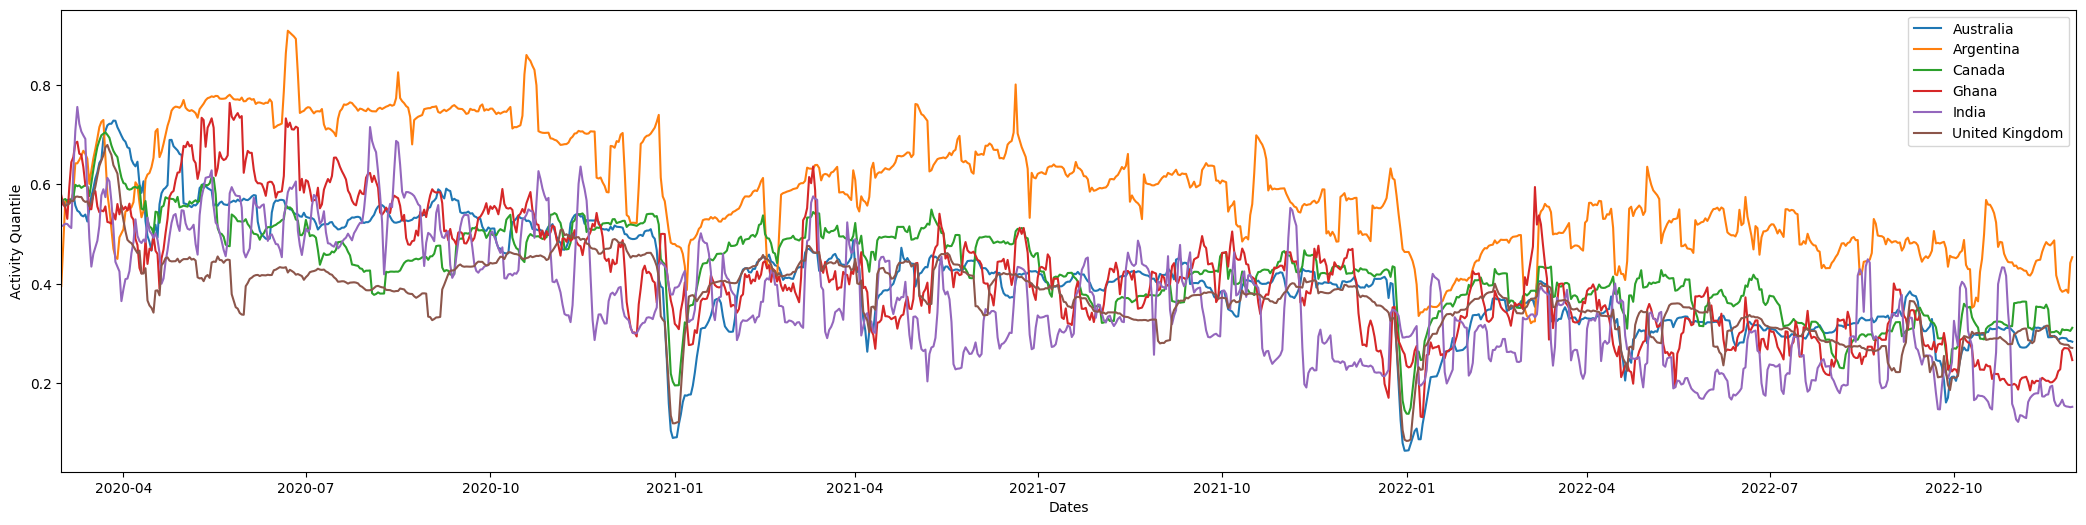


CURRENT BUSINESS TYPE -> Retail 



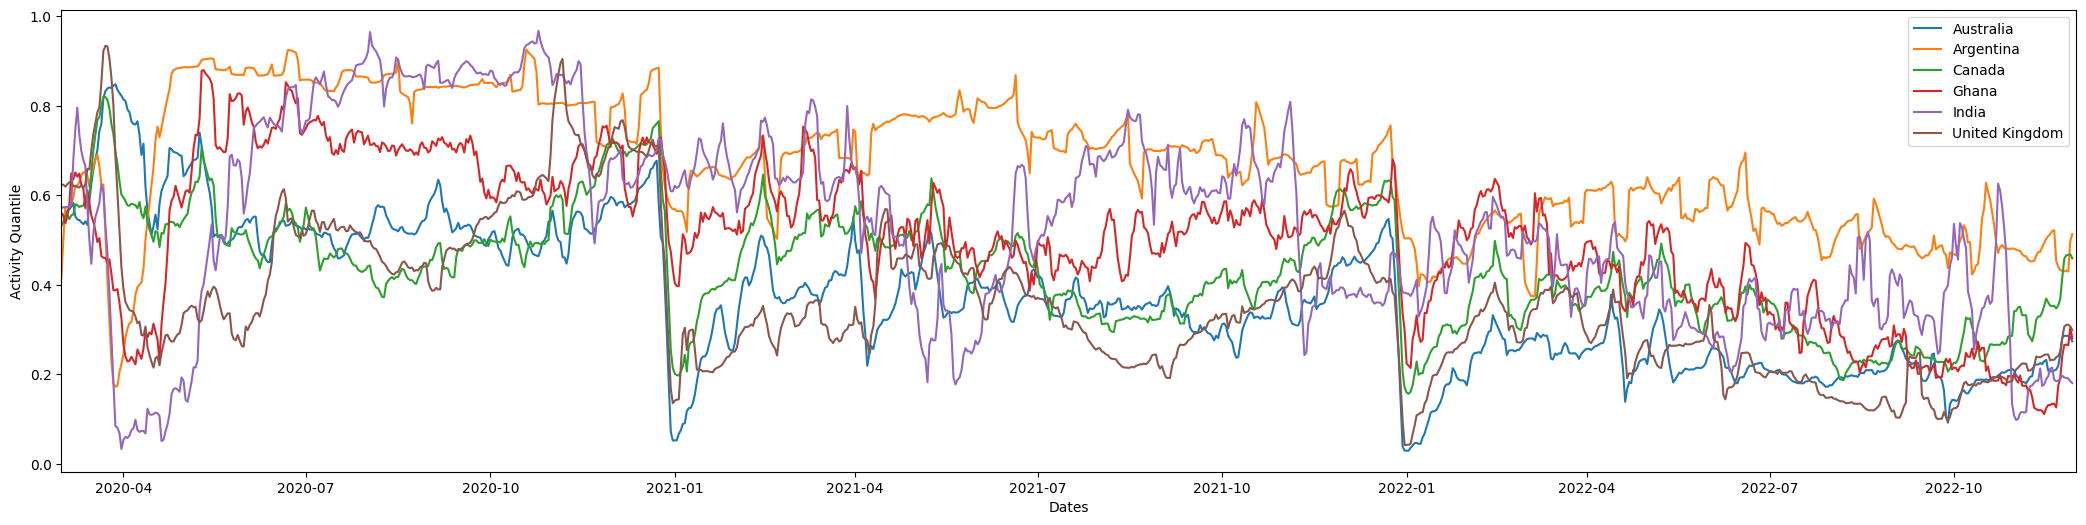


CURRENT BUSINESS TYPE -> Travel 



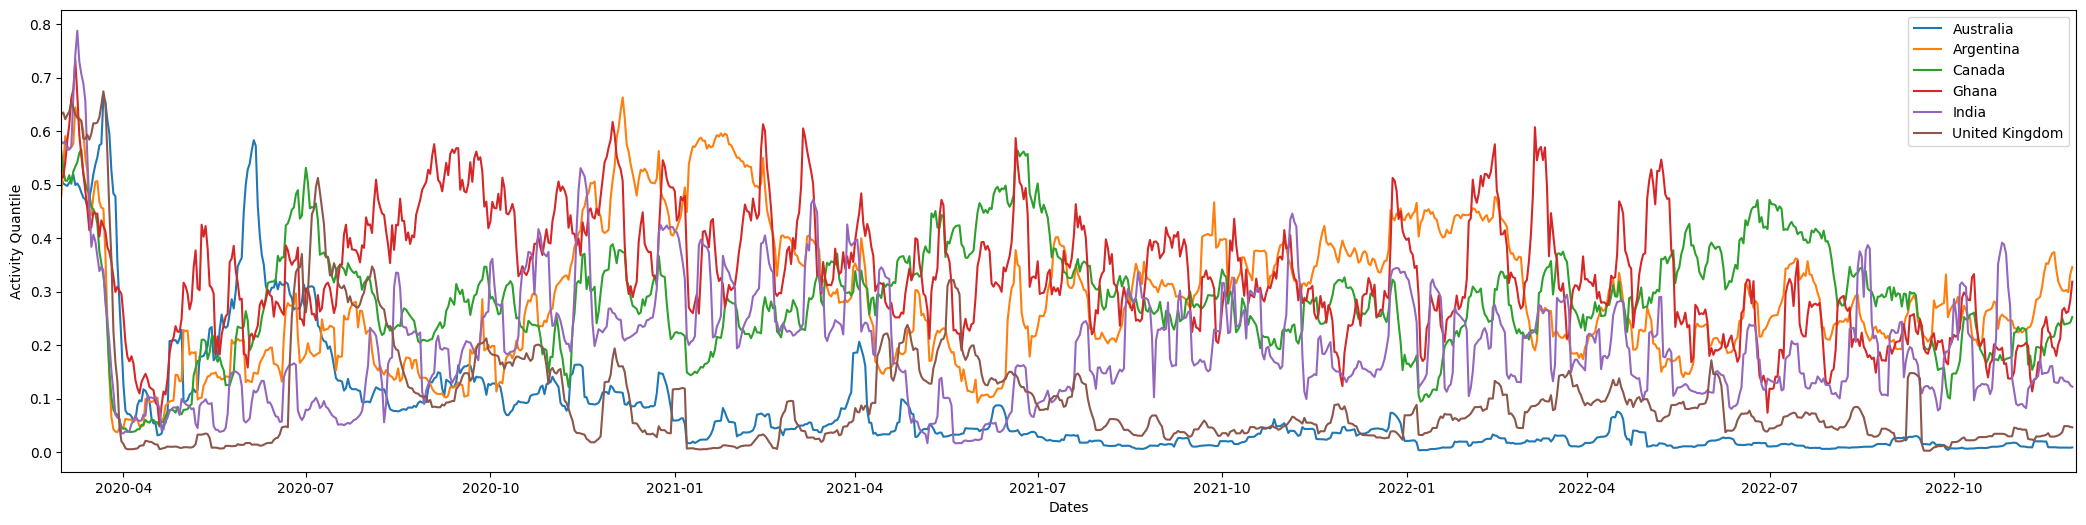


CURRENT BUSINESS TYPE -> Lifestyle Services 



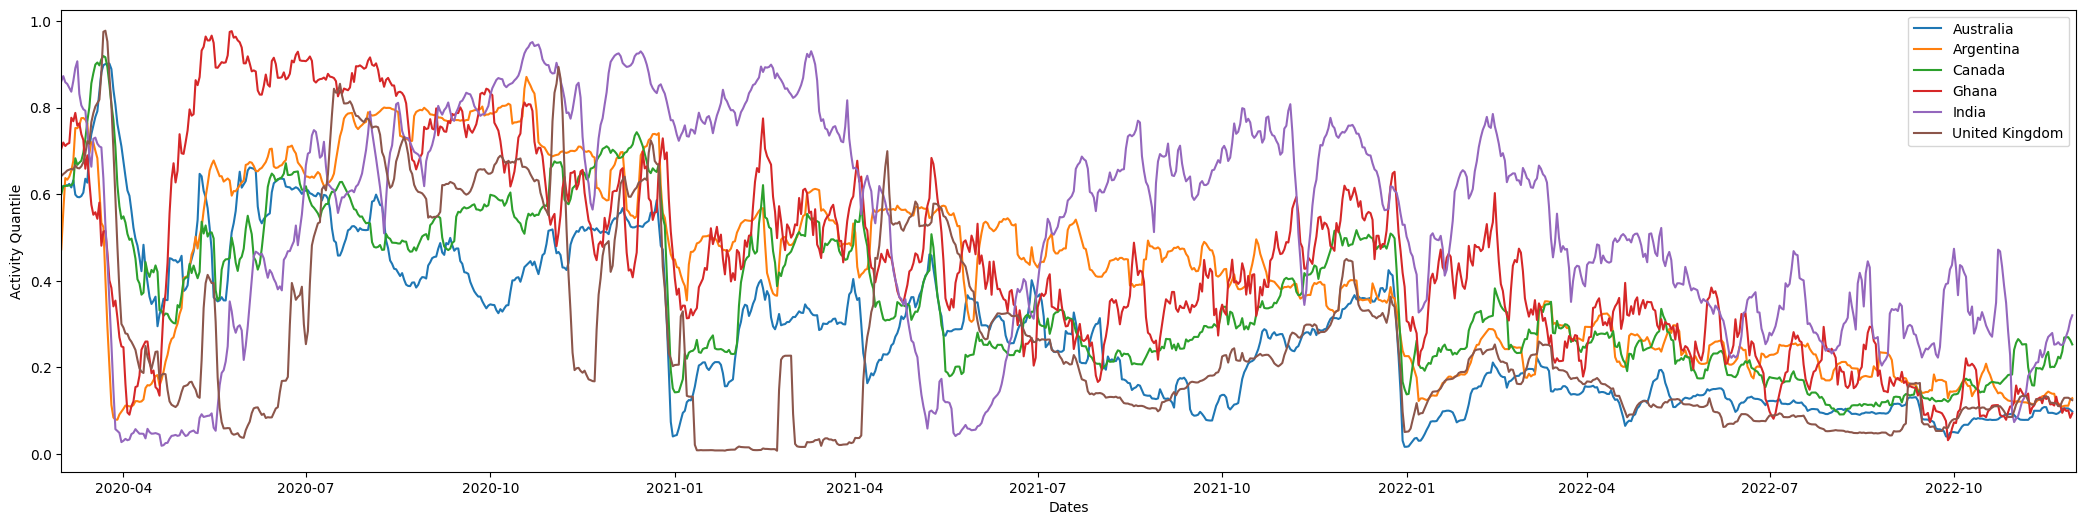


CURRENT BUSINESS TYPE -> Grocery & Convenience Stores 



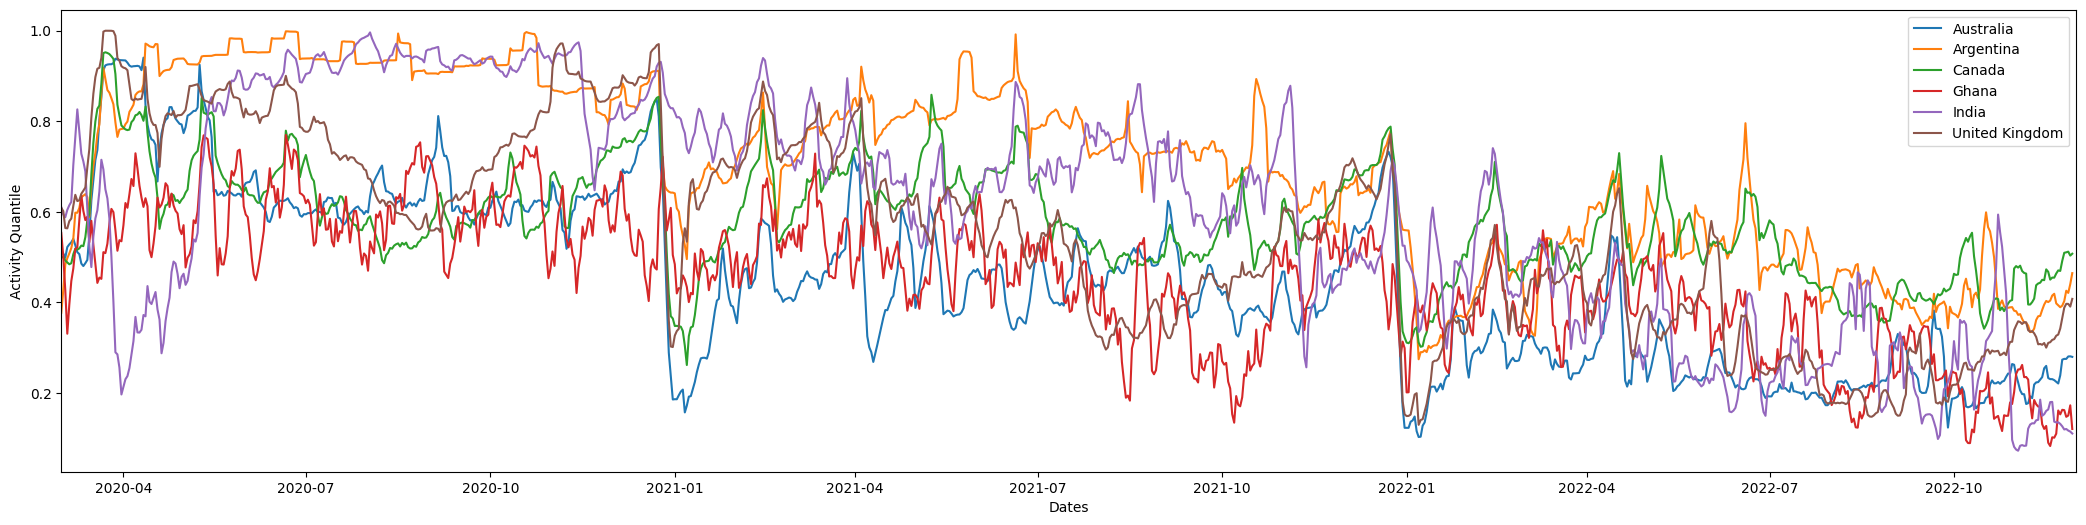


CURRENT BUSINESS TYPE -> Manufacturing 



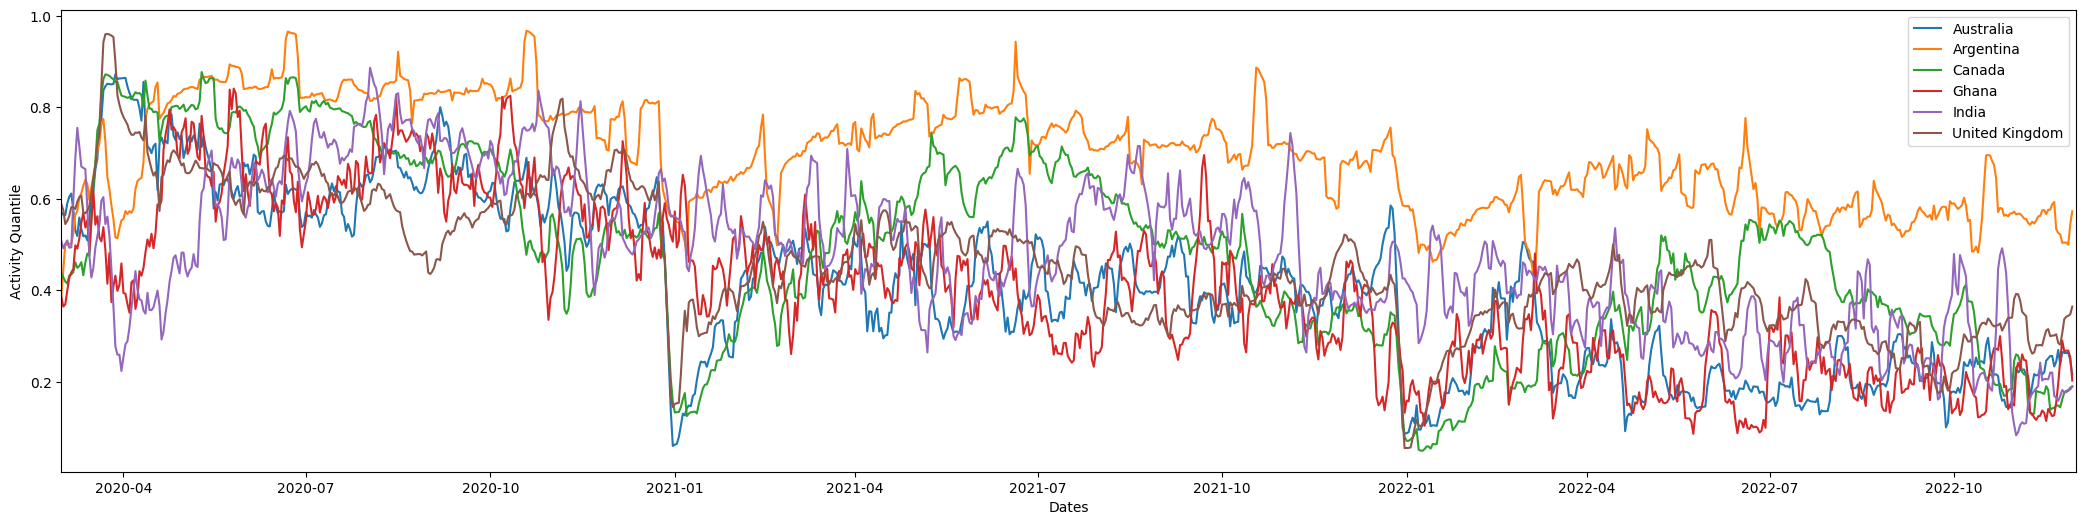


CURRENT BUSINESS TYPE -> Restaurants 



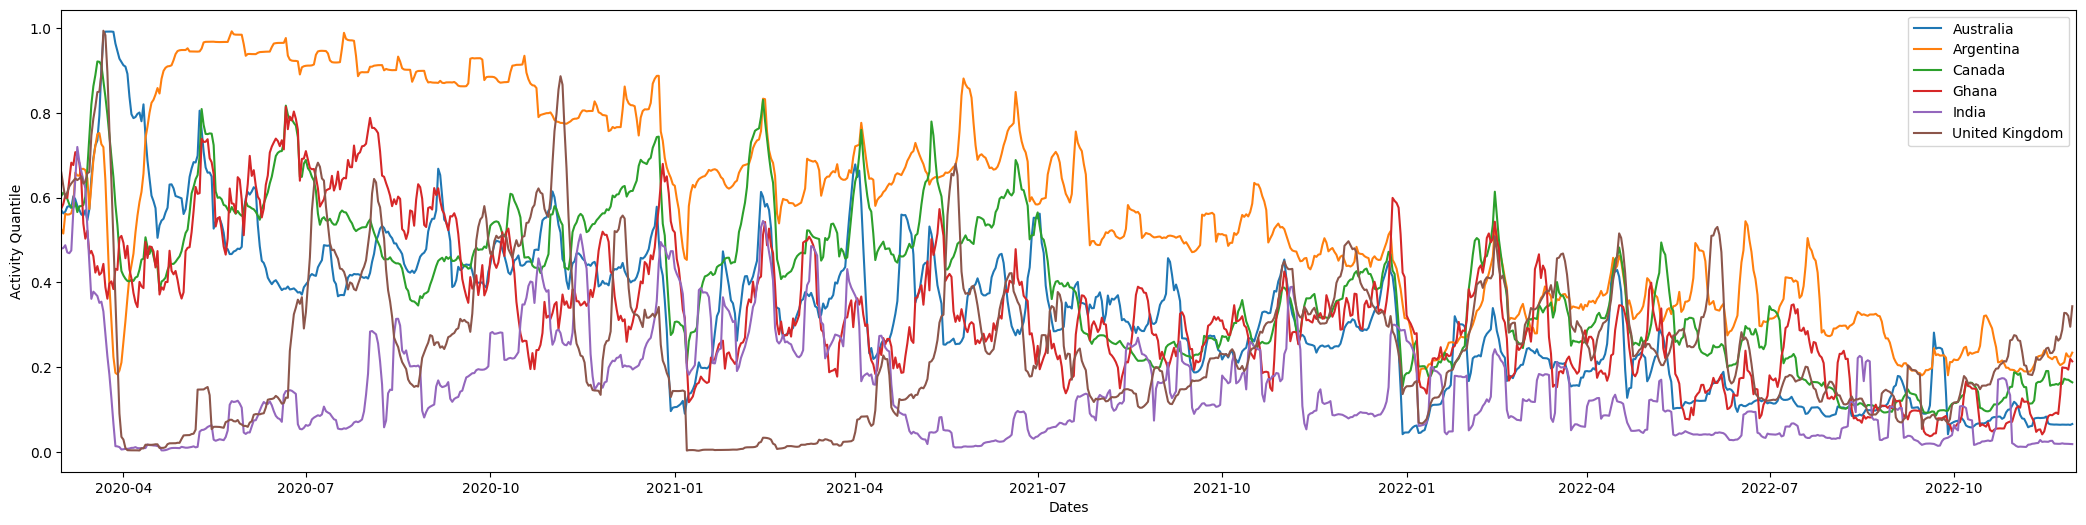


CURRENT BUSINESS TYPE -> Local Events 



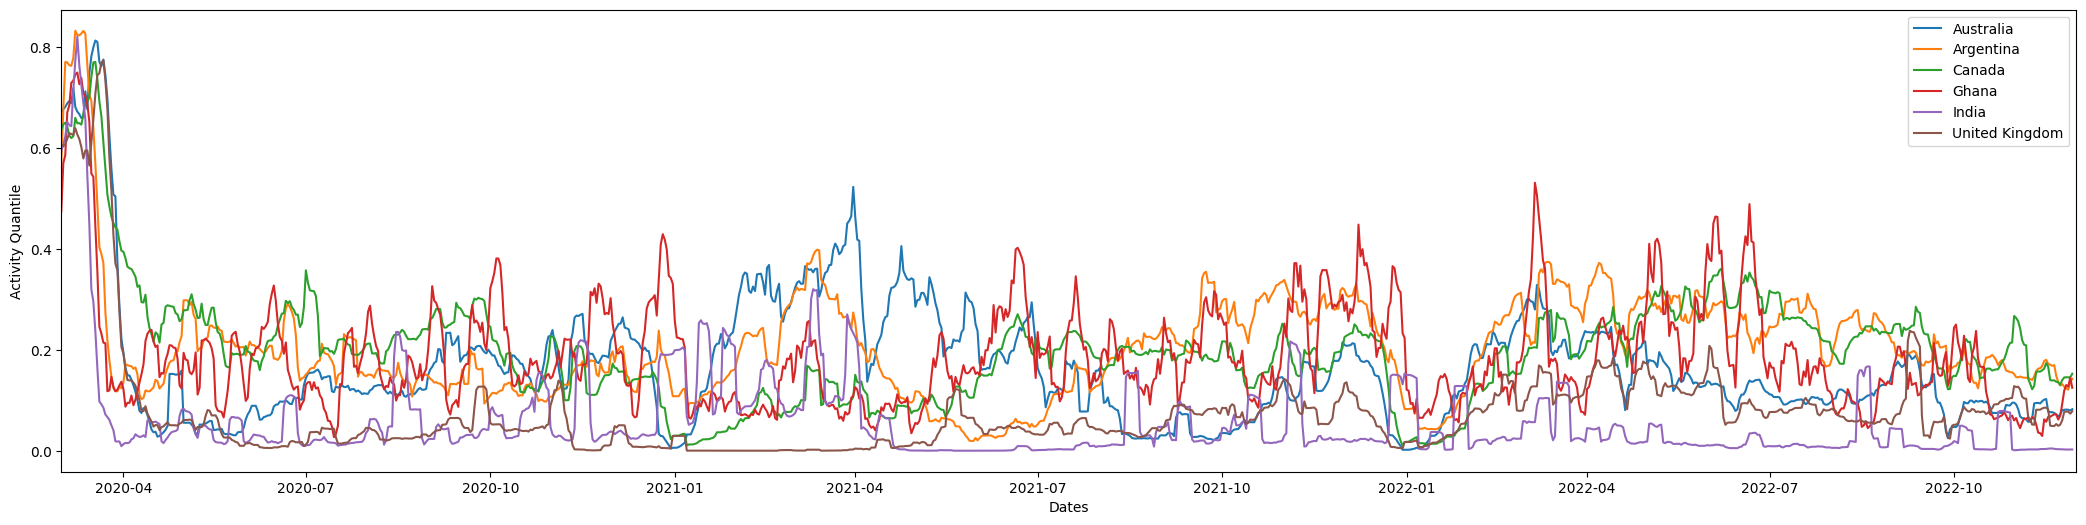


CURRENT BUSINESS TYPE -> All 



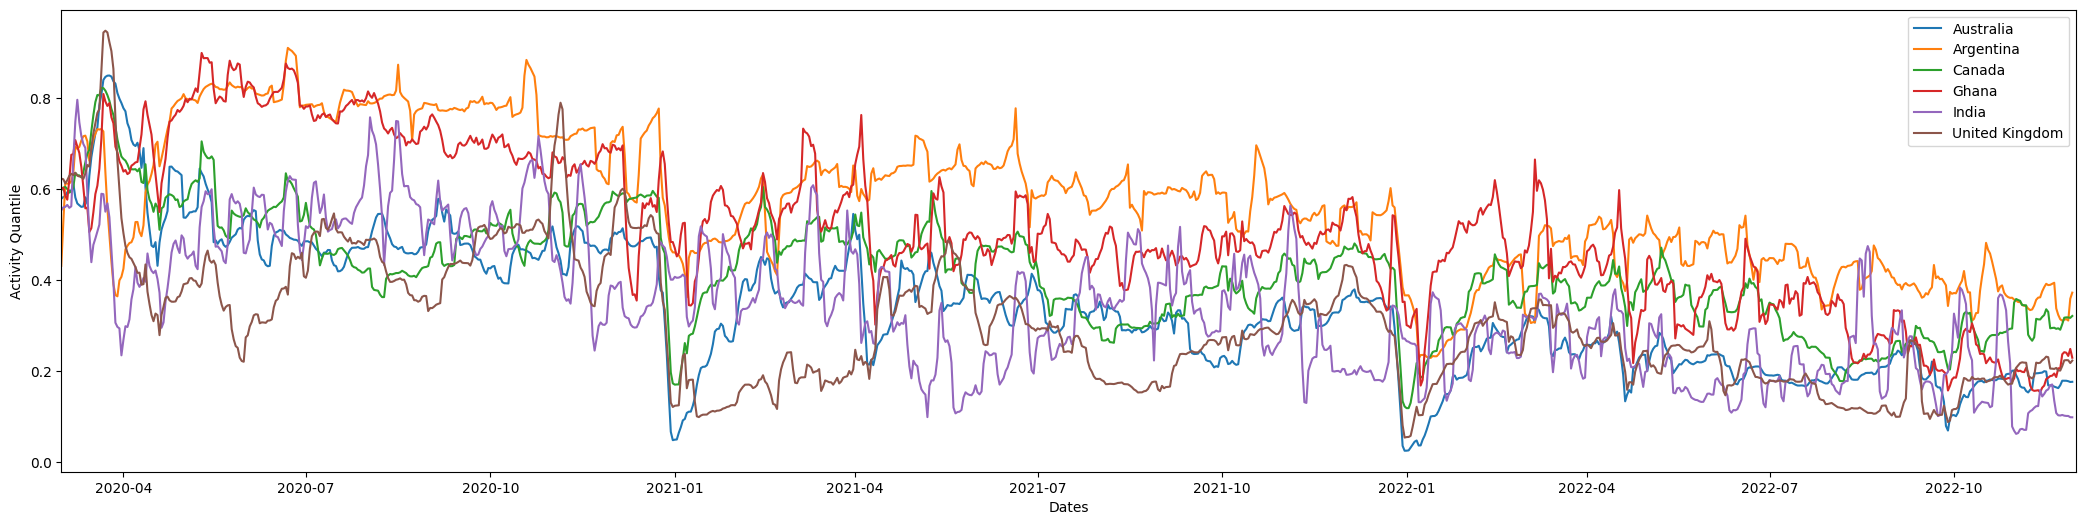


CURRENT BUSINESS TYPE -> Home Services 



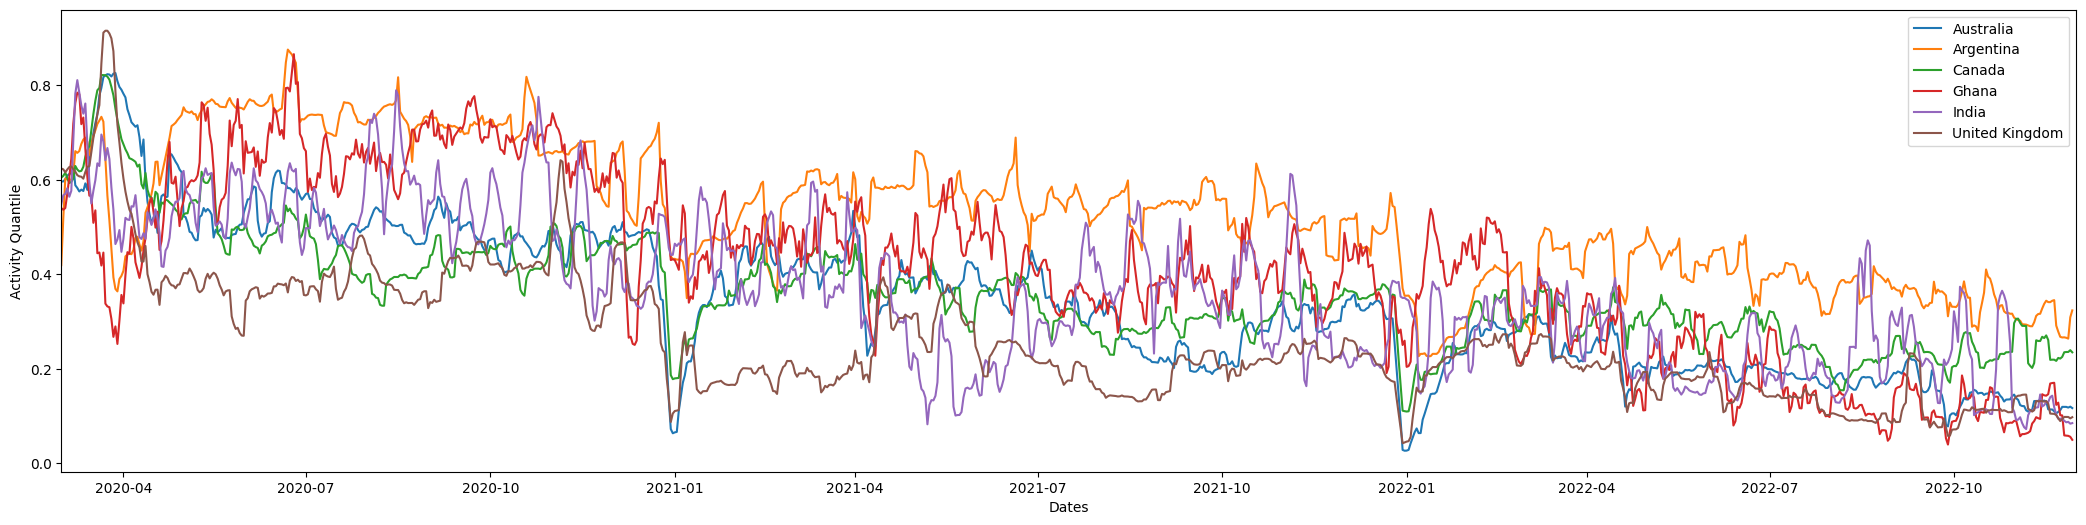


CURRENT BUSINESS TYPE -> Professional Services 



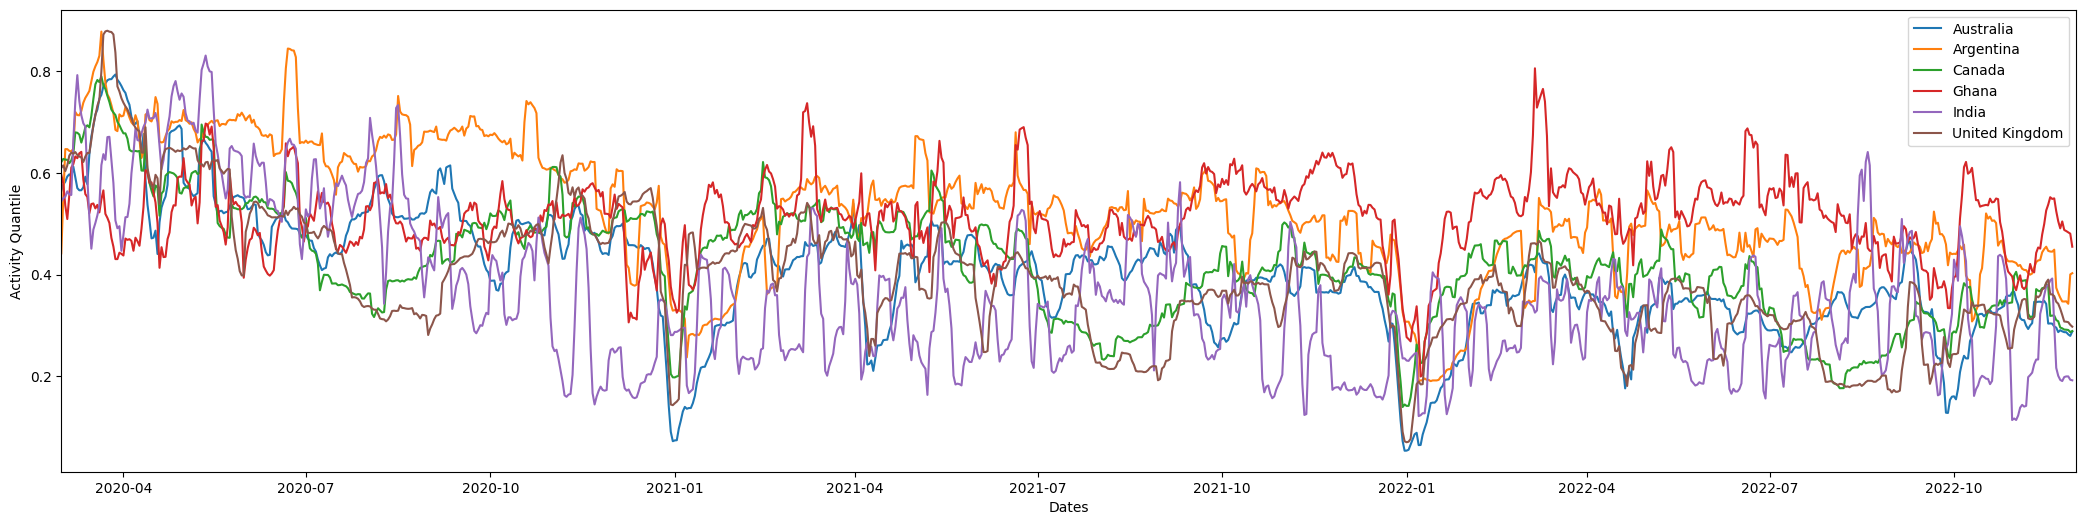


CURRENT BUSINESS TYPE -> Public Good 



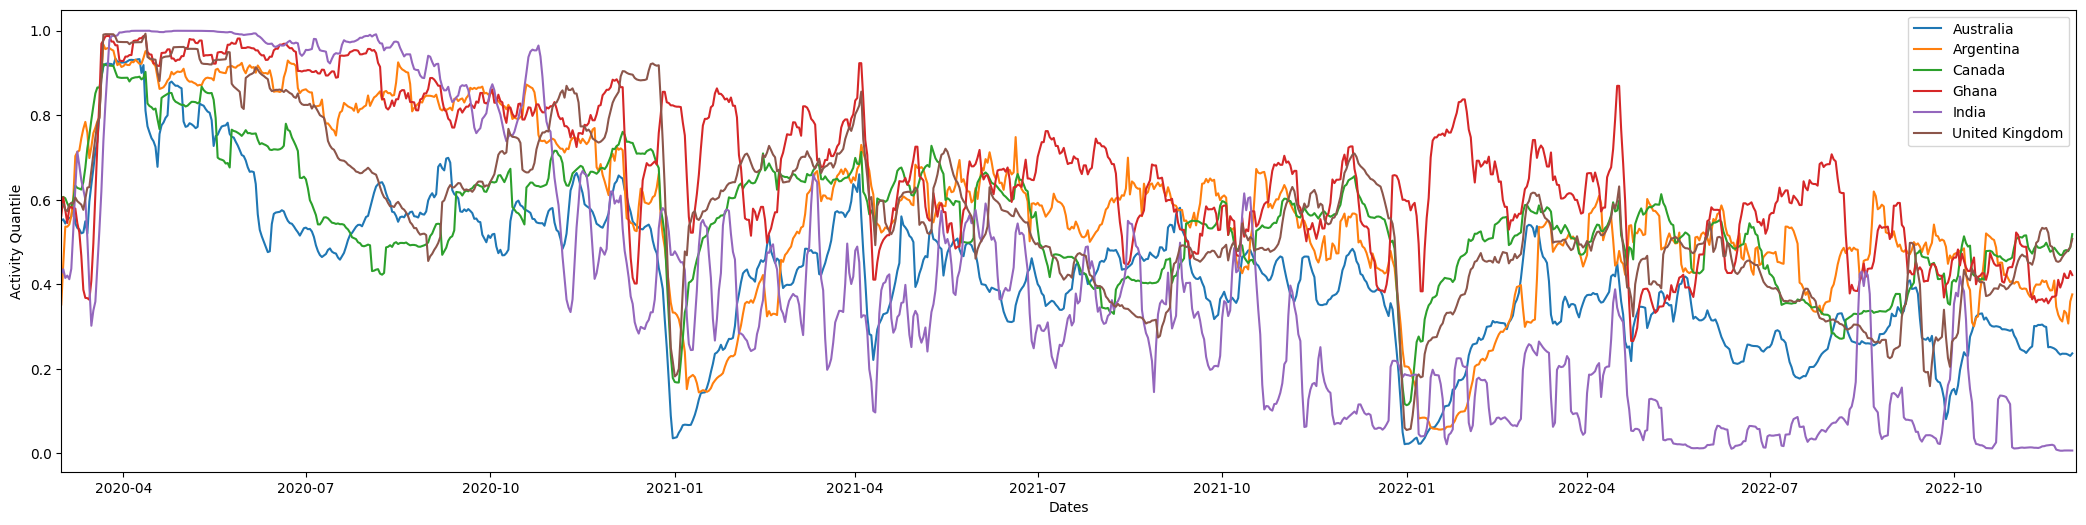

In [ ]:
for business_vertical in business_types:
  print('CURRENT BUSINESS TYPE ->', business_vertical, '\n')
  plt.figure(figsize=(26, 6))
  for gadm_name in selected_countries:
    x_axis = list(pd.DatetimeIndex(dataset[(dataset['gadm_name']==gadm_name) & (dataset['business_vertical']==business_vertical)]['ds']))
    y_axis = list(dataset[(dataset['gadm_name']==gadm_name) & (dataset['business_vertical']==business_vertical)]['activity_quantile'])
    plt.plot(x_axis, y_axis)
  plt.xlim(pd.Timestamp('2020-03'), pd.Timestamp('2022-12'))
  plt.xlabel('Dates')
  plt.ylabel('Activity Quantile')
  plt.legend(selected_countries)
  plt.show()
  print()

Date: 2020-03-31 



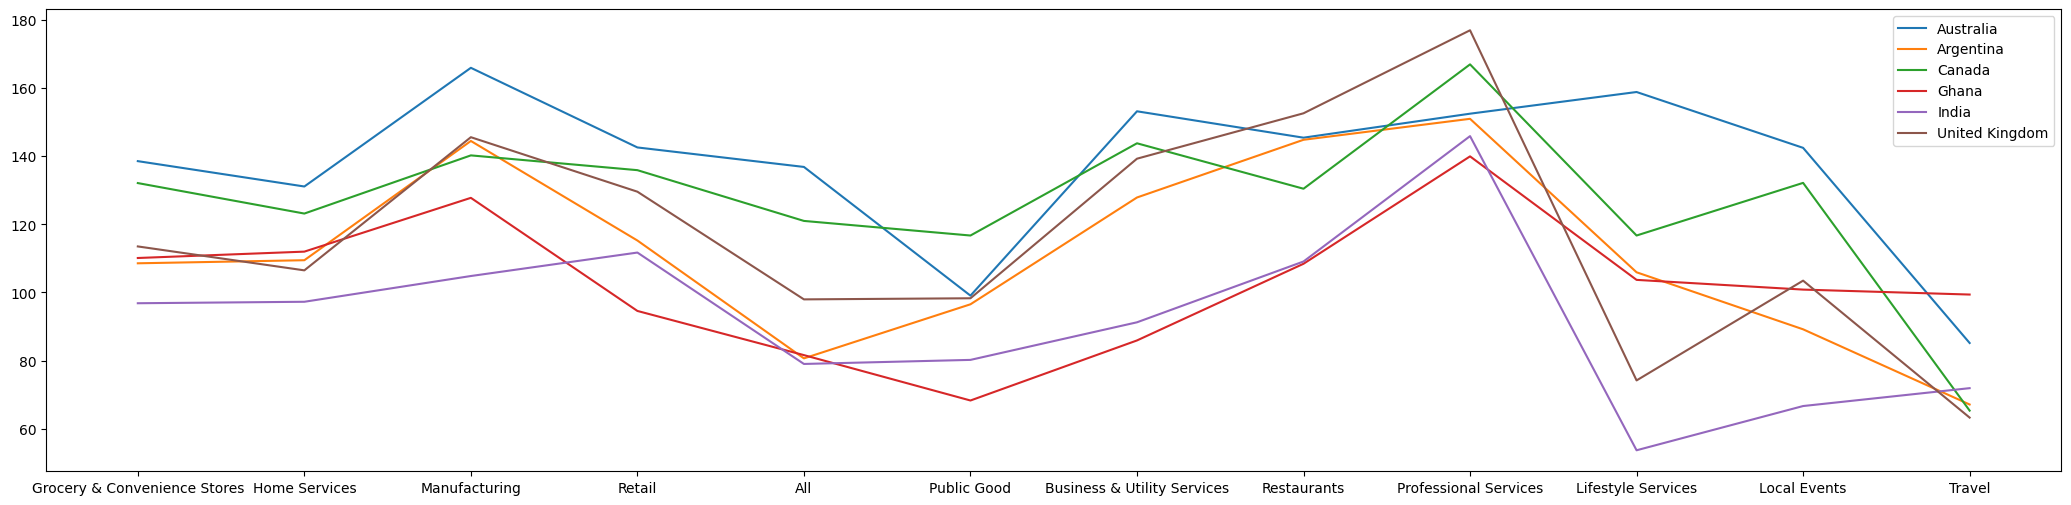


Date: 2020-04-01 



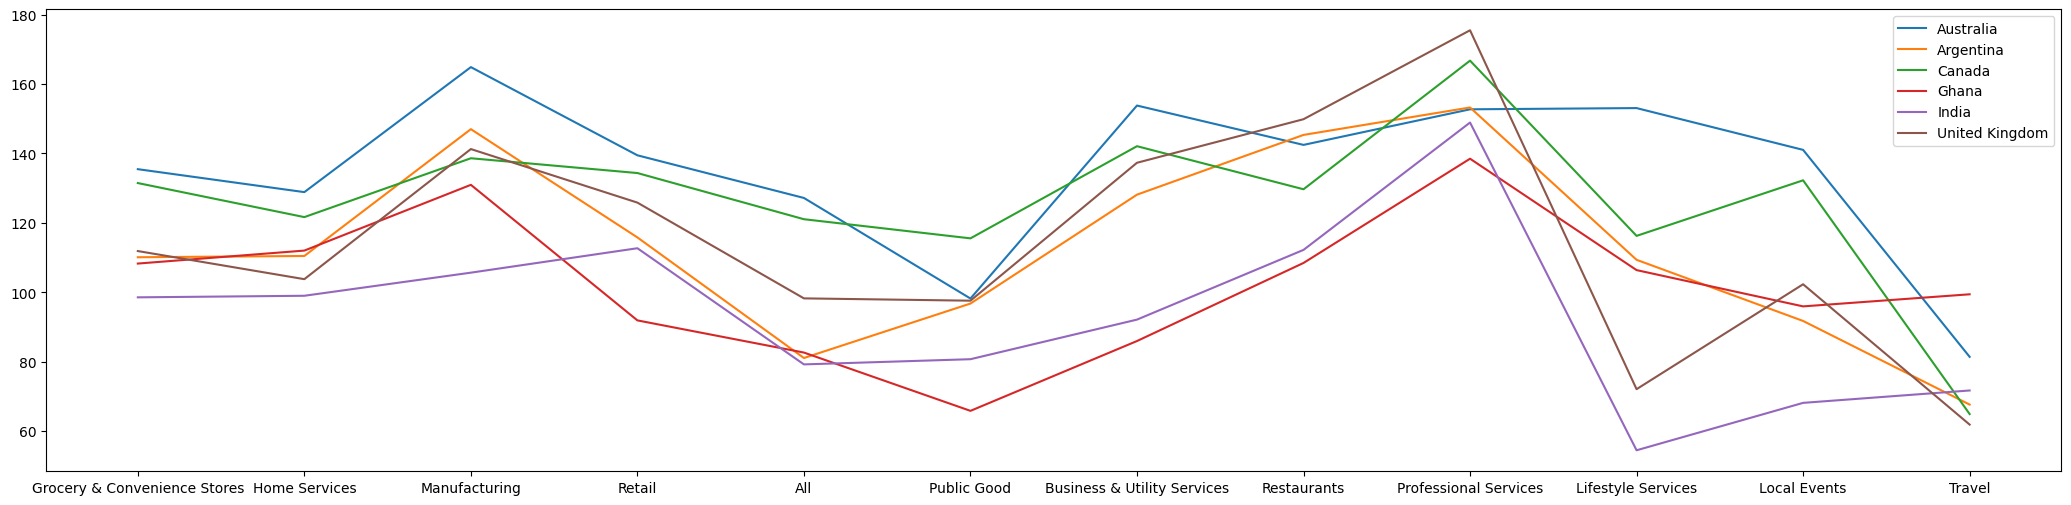


Date: 2020-05-15 



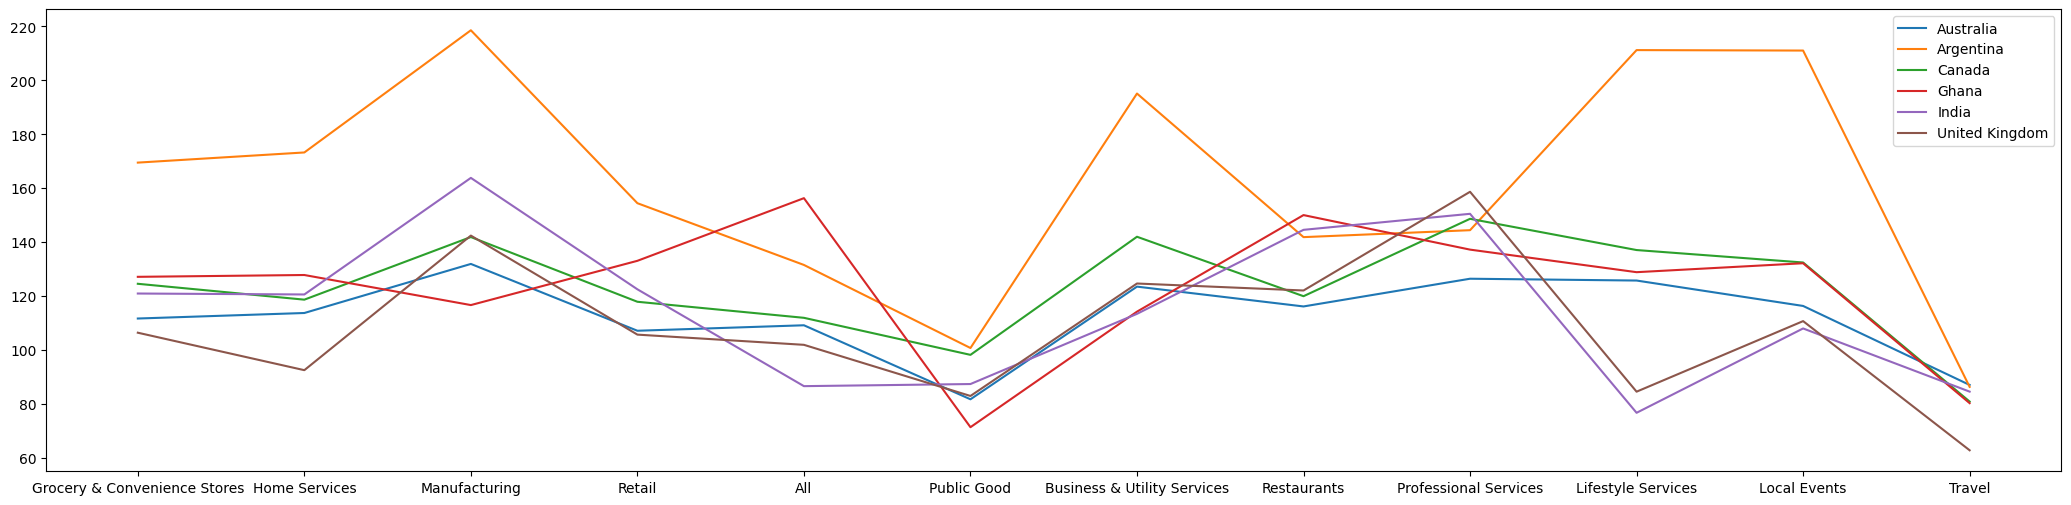


Date: 2020-12-15 



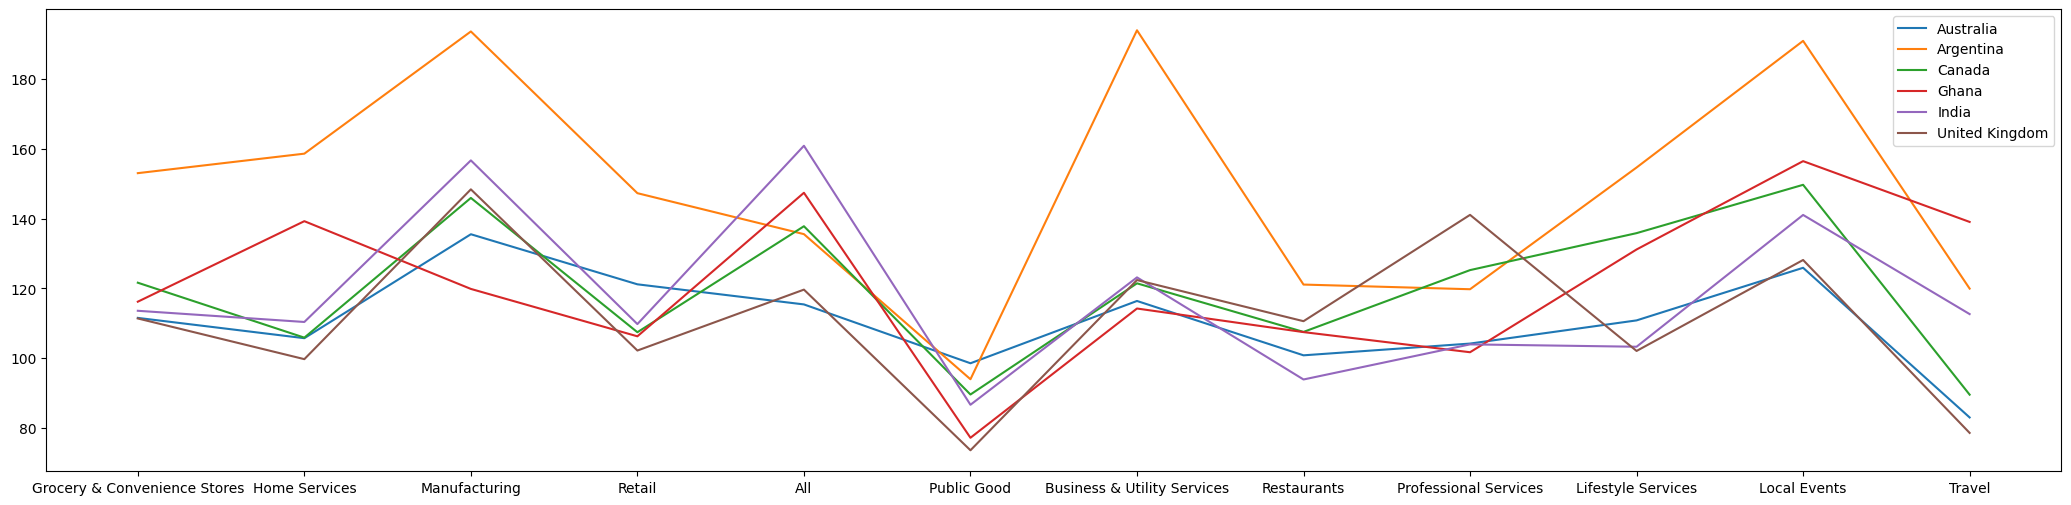


Date: 2021-01-01 



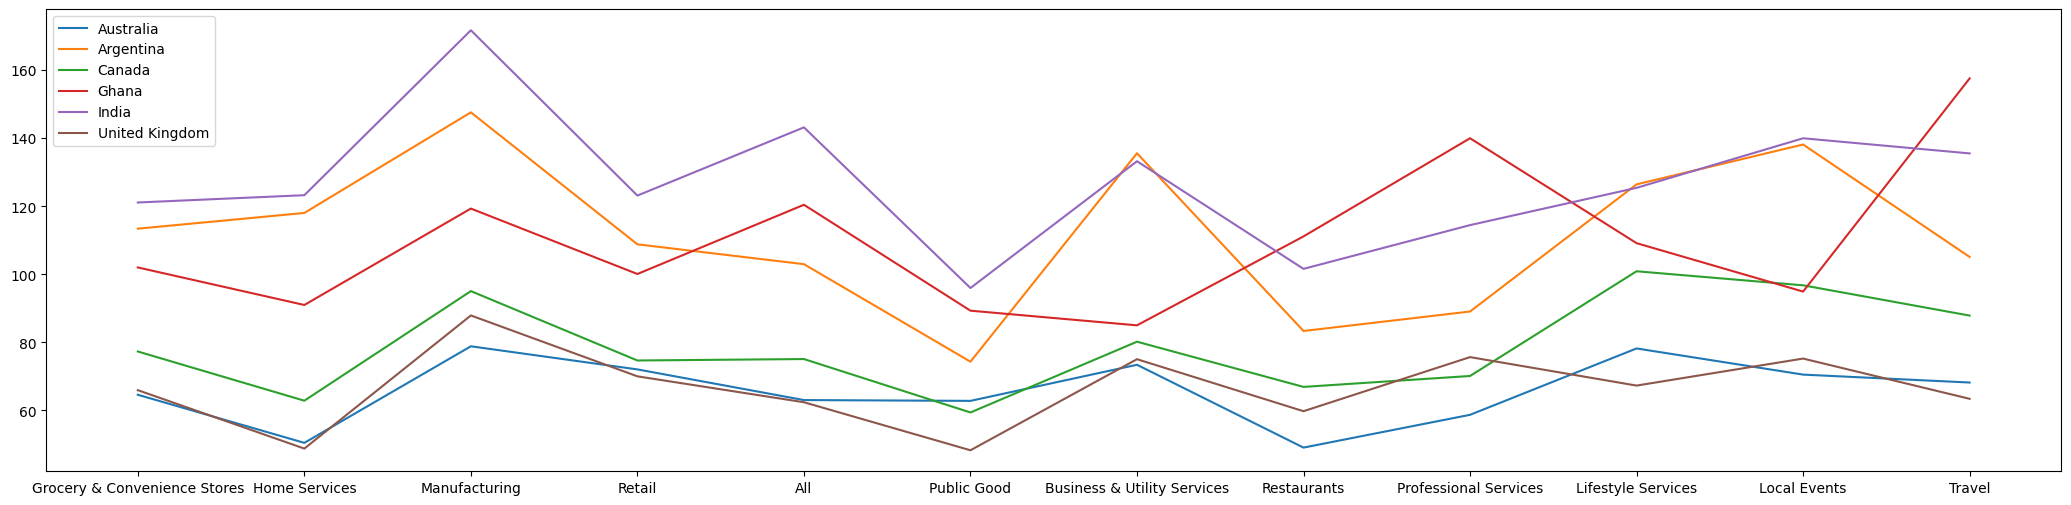


Date: 2021-12-15 



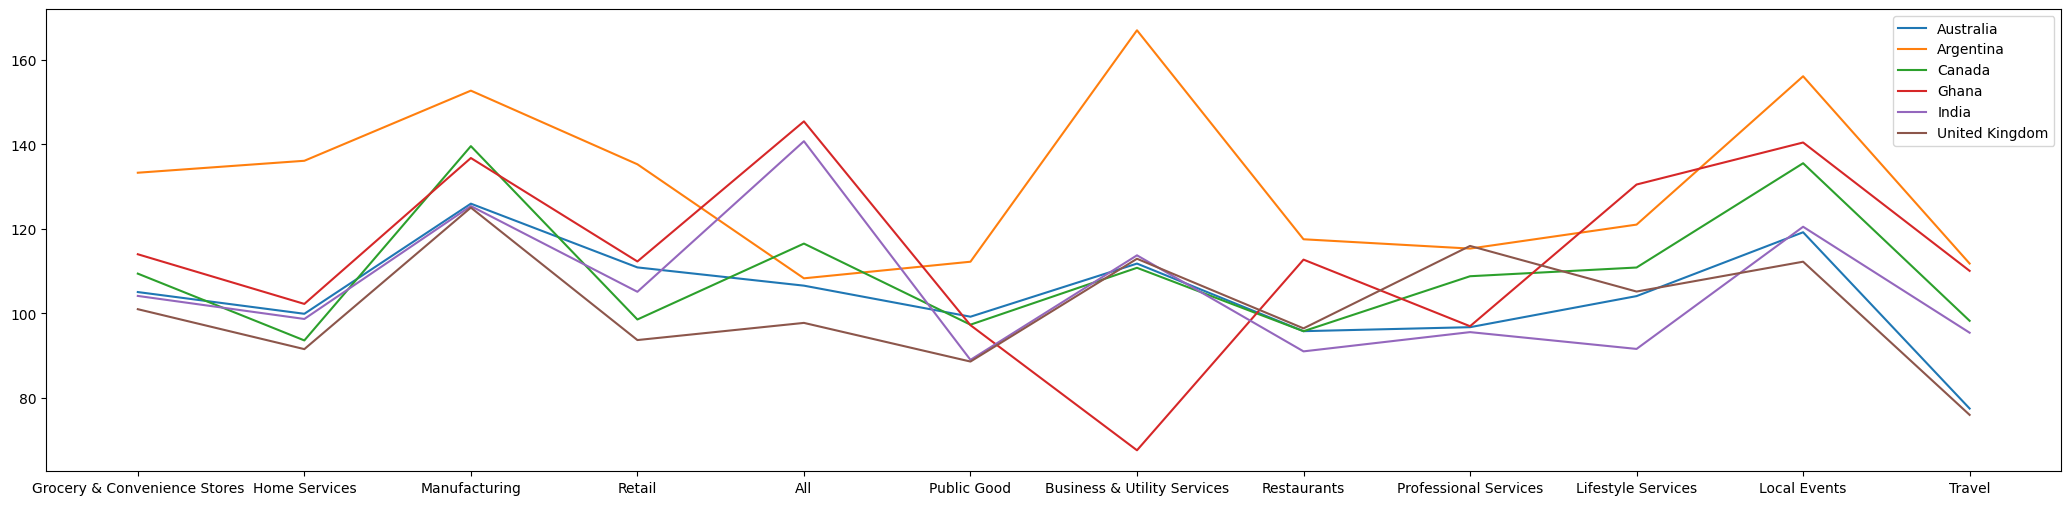


Date: 2022-01-01 



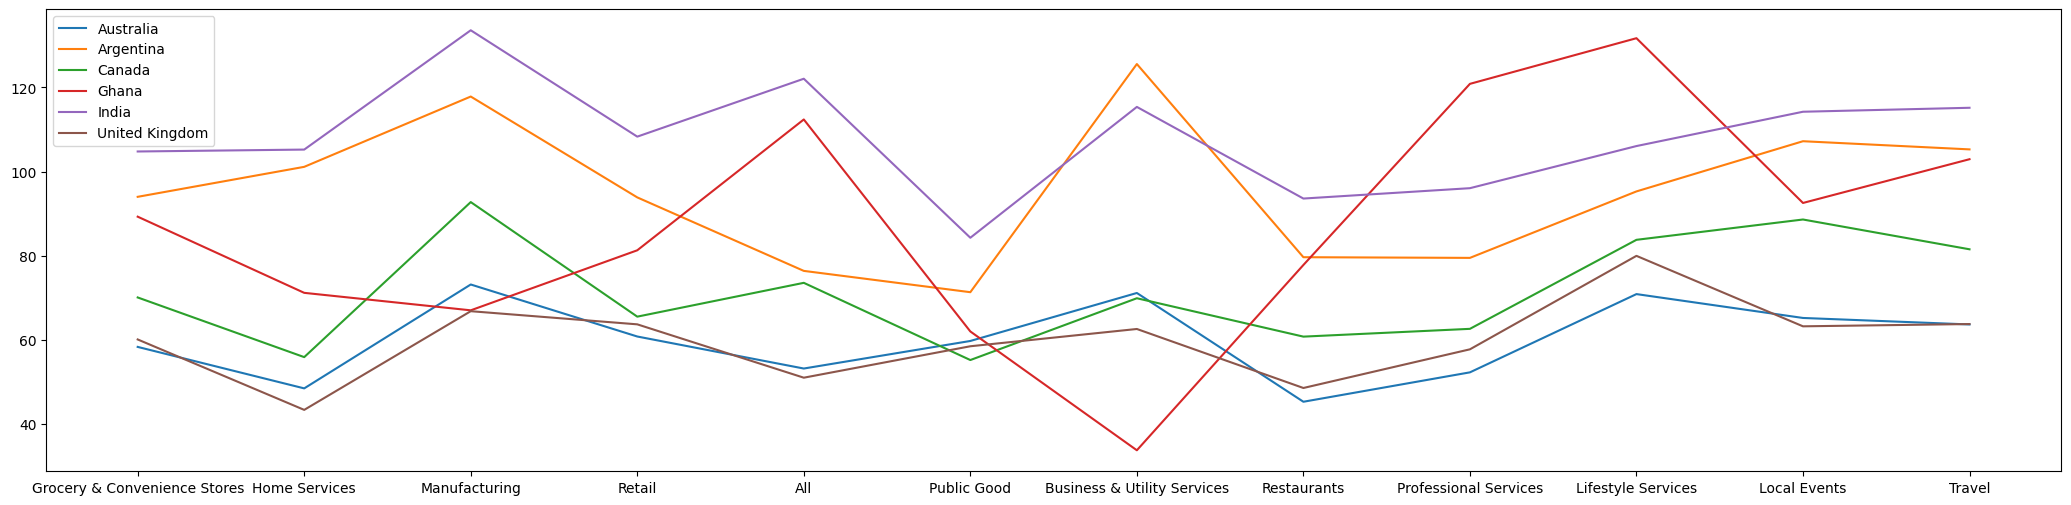


Date: 2022-11-29 



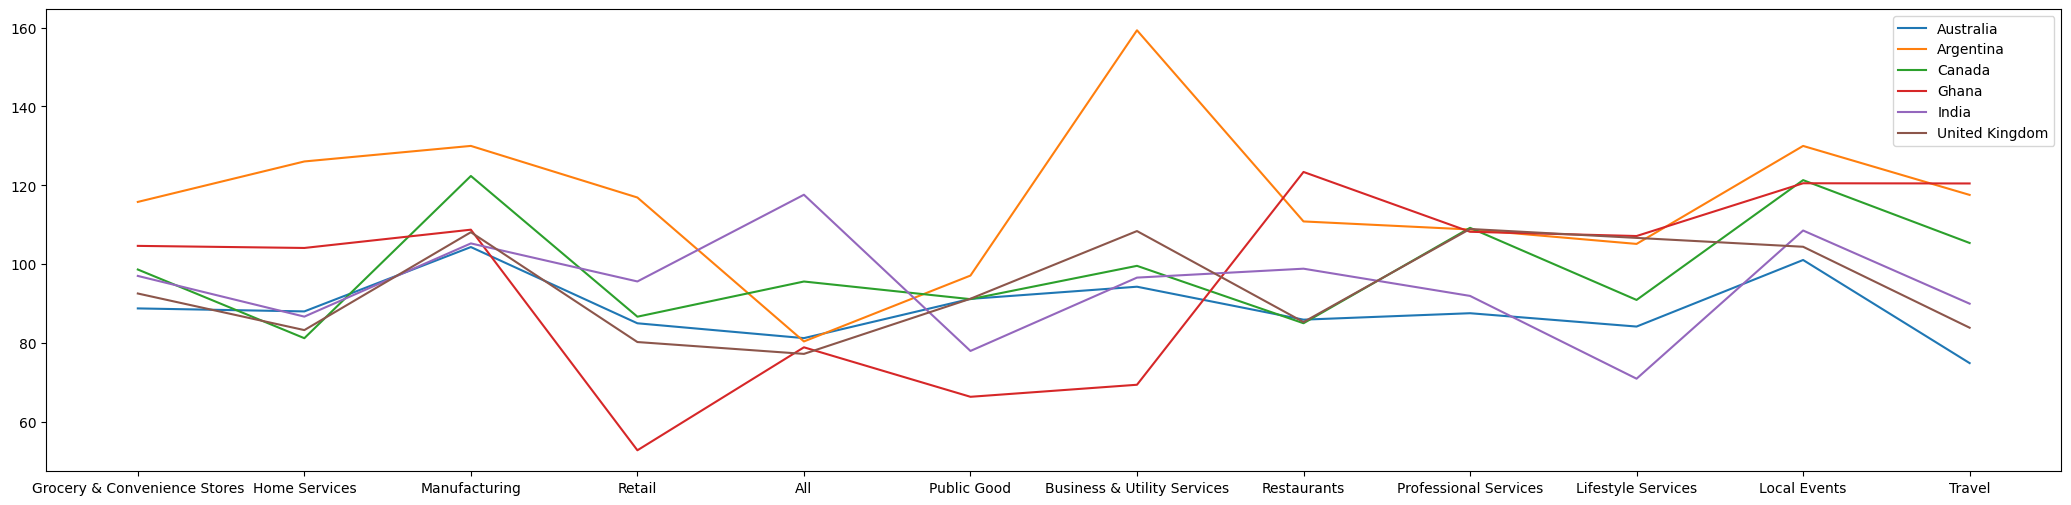

In [ ]:
for ds in selected_dates:
  plt.figure(figsize=(26, 6))
  print('Date:', ds, '\n')
  for gadm_name in selected_countries:
    ap_values = []
    for business_vertical in sorted(business_types):
      ap = dataset[(dataset['gadm_name']==gadm_name) & (dataset['business_vertical']==business_vertical) & (dataset['ds']==ds)]['activity_percentage']
      ap_values.append(ap)
    plt.plot(list(business_types), ap_values)
  plt.legend(selected_countries)
  plt.show()
  print()

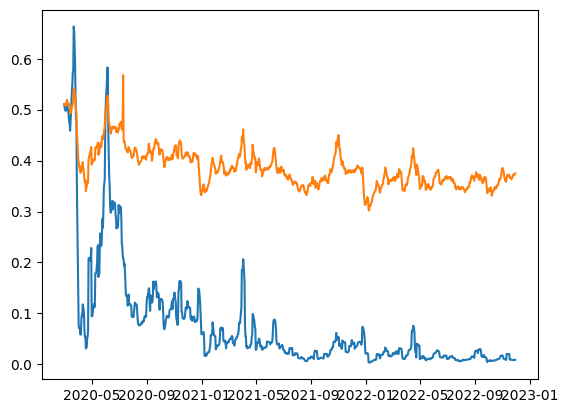

In [ ]:
x_axis = list(pd.DatetimeIndex(dataset[(dataset['gadm_name']=='Australia') & (dataset['business_vertical']=='Travel')]['ds']))
y_axis = list(dataset[(dataset['gadm_name']=='Australia') & (dataset['business_vertical']=='Travel')]['activity_quantile'])
plt.plot(x_axis, y_axis)
y_axis = list(dataset[(dataset['gadm_name']=='Australia') & (dataset['business_vertical']=='Travel')]['activity_percentage']/200)
plt.plot(x_axis, y_axis)